In [69]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
import wave

In [71]:
def readfile(wavfile):
    spf = wave.open(wavfile)
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    signal = signal.astype(np.float32) / 2**(16-1)
    return signal


# 音圧の計算

In [72]:
signal = readfile("/Users/smurakami/Desktop/connichiha.wav")

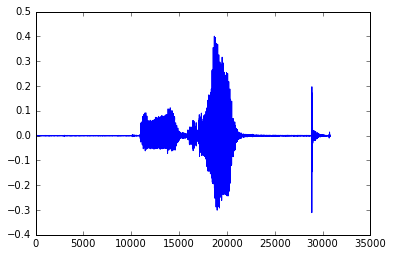

In [73]:
plt.plot(signal)

In [76]:
def getPower(signal, window):
    cumsum = np.cumsum(signal ** 2)
    a = np.arange(len(cumsum) - window)
    b = np.arange(window, len(cumsum))
    power = (cumsum[b] - cumsum[a]) / window
    return power

/usr/local/var/pyenv/versions/anaconda2-4.0.0/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


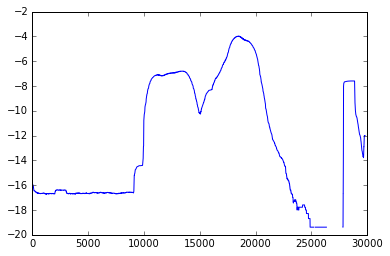

In [77]:
power = getPower(signal, 1000)
plt.plot(np.log(power))

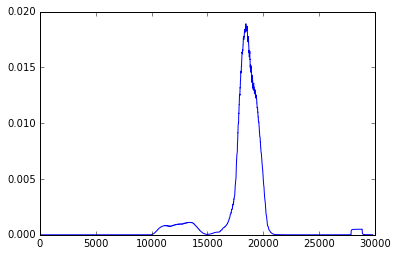

In [78]:
plt.plot(power)

# ピッチの計算

In [79]:
from scipy.fftpack import fft

In [80]:
def pitch0(signal):
    h = fft(signal)
    spec = np.abs(h)
    spec = spec[:len(spec)/2]
    idx = np.arange(len(spec))
    m = sum(spec * idx) / sum(spec)
    return m

In [81]:
low = readfile("/Users/smurakami/Desktop/low.wav")
high = readfile("/Users/smurakami/Desktop/high.wav")

In [82]:
pitch0(low)

3396.6438049785306

In [83]:
pitch0(high)

2658.0685973879945

In [84]:
import scipy.signal as sig

In [85]:
def pitch1(signal, begin, window):
#     window = 3000
#     begin = 15000
    sample = signal[begin:begin+window]
    cor = sig.correlate(sample, sample, mode='full')
    cor = cor[window:]
    a = np.arange(len(cor))[cor < 0][0]
    term = a + np.argmax(cor[a:]) # 周期
    return 16000 / float(term)

import scipy.fftpack as fft
import scipy.signal as sig
def auto_corr(sample):
    return fft.ifft(np.abs(fft.fft(sample)) ** 2)[:len(sample)/2]

def pitch2(signal, begin, window):
#     window = 3000
#     begin = 15000
    sample = signal[begin:begin+window]
    cor = auto_corr(sample)
    a = np.arange(len(cor))[cor < 0][0]
    term = a + np.argmax(cor[a:]) # 周期
    return 16000 / float(term)
    

In [86]:
pitch1(low, 15000, 1000), pitch2(low, 15000, 1000)

(111.11111111111111, 110.34482758620689)

In [126]:
pitch2(low, 0, len(low))

115.10791366906474

In [127]:
pitch2(high, 15000, 1000)

271.1864406779661

In [89]:
def test(signal, begin, window):
#     window = 3000
#     begin = 15000
    sample = signal[begin:begin+window]
    cor = sig.correlate(sample, sample, mode='full')
    cor = cor[window:]
    return cor

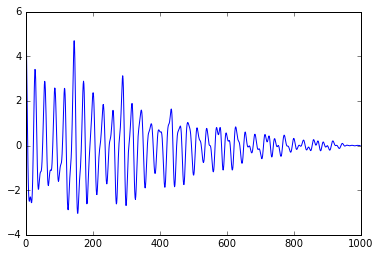

In [90]:
plt.plot(test(low, 15000, 1000))

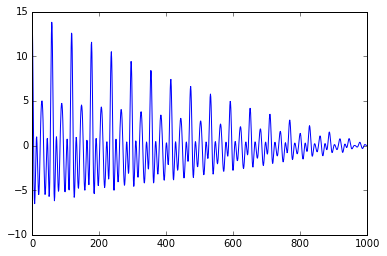

In [91]:
plt.plot(test(high, 15000, 1000))

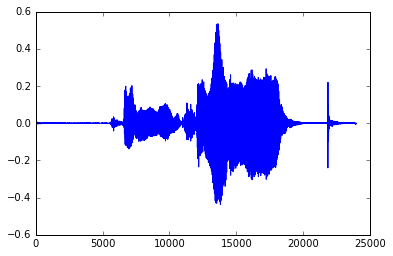

In [92]:
plt.plot(high)

In [93]:
window = 1000
result = np.array([pitch1(low, i, window) for i in xrange(len(low) - window)])

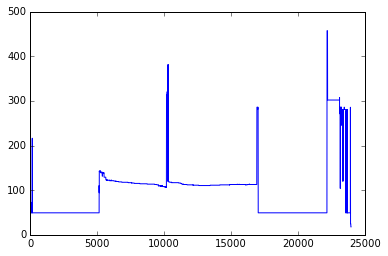

In [106]:
plt.plot(result[result < 500])

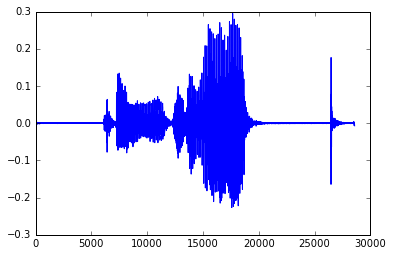

In [95]:
plt.plot(low)

In [96]:
pitch = pitch1

In [97]:
pitch(low, 0, len(low))

111.8881118881119

In [98]:
pitch(high, 0, len(high))

280.70175438596493

In [99]:
w = readfile('/Users/smurakami/Desktop/middle_c.wav')
pitch(w, 0, len(w))

142.85714285714286

In [100]:
w = readfile('/Users/smurakami/Desktop/high_c.wav')
pitch(w, 0, len(w))

197.53086419753086

# 抑揚の計算

In [101]:
low = readfile('/Users/smurakami/Desktop/arigato_low.wav')

In [102]:
def intonation(sample, window):
    p = getPower(sample, window)
    mean = np.mean(p)
    s = sum((p - mean) ** 2) / len(p)
    return s

In [103]:
intonation(readfile('/Users/smurakami/Desktop/arigato_low.wav'), 1000)

3.796469801975618e-07

In [104]:
intonation(readfile('/Users/smurakami/Desktop/arigato_high.wav'), 1000)

0.00016607725004731192

# 自己相関関数の計算

In [107]:
sample = readfile('/Users/smurakami/Desktop/arigato_low.wav')

In [108]:
import scipy.fftpack as fft
import scipy.signal as sig

In [109]:
c0 = fft.ifft(np.abs(fft.fft(sample)) ** 2)

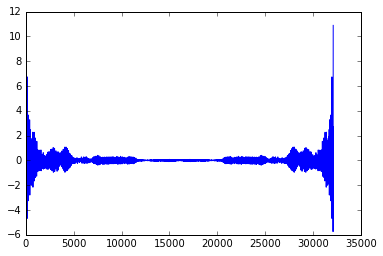

In [110]:
plt.plot(c0)

In [111]:
c1 = sig.correlate(sample, sample, mode='full')

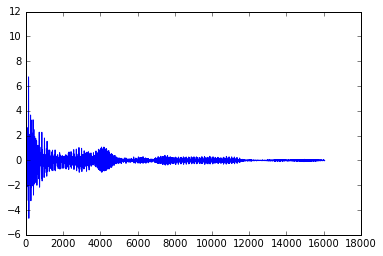

In [112]:
plt.plot(c0[:len(c0)/2])

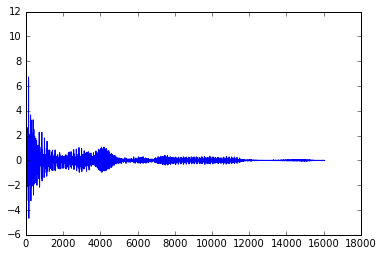

In [113]:
plt.plot(c1[len(c1)/2:][:len(c0)/2])

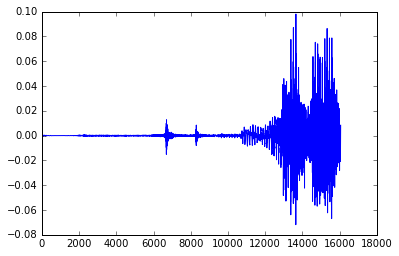

In [114]:
plt.plot(c1[len(c1)/2:][:len(c0)/2] - c0[:len(c0)/2])

In [115]:
import scipy.fftpack as fft
import scipy.signal as sig
def auto_corr(sample):
    return fft.ifft(np.abs(fft.fft(sample)) ** 2)[:len(sample)/2]

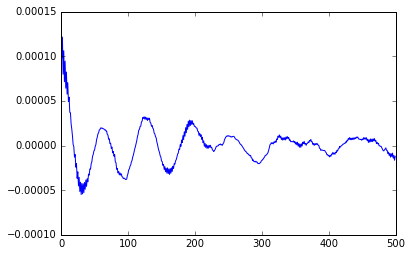

In [116]:
plt.plot(auto_corr(sample[:1000]))

In [130]:
corr = auto_corr(sample[:1000])

In [136]:
np.arange(len(corr))[corr < 0][0]

19

In [137]:
filepaths = [
           "/Users/smurakami/Desktop/taka_kora.wav",
            "/Users/smurakami/Desktop/taka_kanashii.wav",
            "/Users/smurakami/Desktop/taka_ureshii.wav",
            "/Users/smurakami/Desktop/taka_coemoji.wav",
            "/Users/smurakami/Desktop/mura_ureshii.wav",
            "/Users/smurakami/Desktop/mura_kora.wav",
            "/Users/smurakami/Desktop/mura_kanashii.wav",
            "/Users/smurakami/Desktop/mura_coemoji.wav",
        ]


In [141]:
for filepath in filepaths:
    print(filepath)
    sample = readfile(filepath)
    print(pitch2(sample, 0, len(sample)))

/Users/smurakami/Desktop/taka_kora.wav
280.701754386
/Users/smurakami/Desktop/taka_kanashii.wav
146.788990826
/Users/smurakami/Desktop/taka_ureshii.wav
3200.0
/Users/smurakami/Desktop/taka_coemoji.wav
164.948453608
/Users/smurakami/Desktop/mura_ureshii.wav
231.884057971
/Users/smurakami/Desktop/mura_kora.wav
168.421052632
/Users/smurakami/Desktop/mura_kanashii.wav
172.043010753
/Users/smurakami/Desktop/mura_coemoji.wav
89.8876404494
